In [5]:
%matplotlib inline

import zipfile
import numpy as np
import pylab as plt
import pandas as pd

from glob import glob

In [6]:
zip_ref = zipfile.ZipFile('./datasets/UN.zip', 'r')
zip_ref.extractall('./datasets/')

In [9]:
glob('./datasets/*')

['./datasets/monthly-milk-production-pounds.csv',
 './datasets/significant-earthquakes.csv',
 './datasets/2014_world_gdp_with_codes.csv',
 './datasets/tesla-stock-price.csv',
 './datasets/maternal_health.csv',
 './datasets/earthquake.csv',
 './datasets/migrants.csv',
 './datasets/UN.zip',
 './datasets/disease.csv',
 './datasets/gapminderDataFiveYear.csv',
 './datasets/diabetes.csv',
 './datasets/su5m.csv',
 './datasets/UN']

In [10]:
countries = ['Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Dem. People's Rep. Korea",
       'Dem. Rep. of the Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland',
       'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada',
       'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
       "Lao People's Dem. Rep.", 'Latvia', 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall Islands', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico',
       'Micronesia (Fed. States of)', 'Monaco', 'Mongolia', 'Montenegro',
       'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
       'Nauru', 'Nepal', 'Netherlands', 'Netherlands Antilles [former]',
       'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
       'Niue', 'North Macedonia', 'Norway', 'Oman',
       'Other non-specified areas', 'Pakistan', 'Palau', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea',
       'Republic of Moldova', 'Réunion', 'Romania', 'Russian Federation',
       'Rwanda', 'Saint Helena', 'Ascension', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Vincent & Grenadines', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan',
       'Spain', 'Sri Lanka', 'State of Palestine', 'Sudan', 'Suriname',
       'Eswatini', 'Sweden', 'Switzerland', 'Syrian Arab Republic',
       'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau',
       'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom',
       'United Rep. of Tanzania', 'United States of America',
       'United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Boliv. Rep. of)', 'Viet Nam',
       'Wallis and Futuna Islands', 'Yemen', 'Zambia', 'Zimbabwe']

### Internet

In [14]:
filename = './datasets/UN/SYB62_T29_201904_Internet Usage.csv'
df = pd.read_csv(filename,encoding='latin1',header=[1])
df = df.rename(columns={'Unnamed: 1':'country','Value':'internetusage'})
df = df[df['country'].isin(countries)]
df.columns

Index(['Region/Country/Area', 'country', 'Year', 'Series', 'internetusage',
       'Footnotes', 'Source'],
      dtype='object')

In [15]:
df_internet = df[['country', 'Year', 'internetusage']]
del df

### CPI

In [16]:
filename = './datasets/UN/SYB61_T19_Consumer Price Index.csv'
df = pd.read_csv(filename,encoding='latin1',header=[1])
df = df.rename(columns={'Unnamed: 1':'country'})
df = df[df['country'].isin(countries)]
df.columns

Index(['Region/Country/Area', 'country', 'Year', 'Series', 'Value',
       'Footnotes', 'Source'],
      dtype='object')

In [17]:
dfp = df[['country', 'Year', 'Series', 'Value']]
dfp1 = dfp[dfp['Series']=='Consumer price index: General']
dfp1 = dfp1.rename(columns={'Value':'CPIG'})
dfp1 = dfp1[['country', 'Year', 'CPIG']]

dfp2 = dfp[dfp['Series']=='Consumer price index: Food']
dfp2 = dfp2.rename(columns={'Value':'CPIF'})
dfp2 = dfp2[['country', 'Year', 'CPIF']]

dfcpi = dfp1.merge(dfp2,on=['country', 'Year'])
del df,dfp,dfp1,dfp2

### Imports and Exports 

In [18]:
filename = './datasets/UN/SYB61_T21_Total Imports, Exports and Balance of Trade.csv'
df = pd.read_csv(filename,encoding='latin1',header=[1])
df = df.rename(columns={'Unnamed: 1':'country'})
df = df[df['country'].isin(countries)]
df.columns

Index(['Region/Country/Area', 'country', 'Year', 'Series', 'System of trade',
       'System of trade footnote', 'Value', 'Footnotes', 'Source'],
      dtype='object')

In [19]:
dfp = df[['country', 'Year', 'Series', 'Value']]
dfp1 = dfp[dfp['Series']=='Imports CIF (millions of US dollars)']
dfp1 = dfp1.rename(columns={'Value':'Imports'})
dfp1 = dfp1[['country', 'Year', 'Imports']]

dfp2 = dfp[dfp['Series']=='Exports FOB (millions of US dollars)']
dfp2 = dfp2.rename(columns={'Value':'Exports'})
dfp2 = dfp2[['country', 'Year', 'Exports']]
dfcpi
dfimex = dfp1.merge(dfp2,on=['country', 'Year'])
del df,dfp,dfp1,dfp2

### Crime

In [20]:
filename = './datasets/UN/SYB62_T12_201904_Intentional homicides and Other Crimes.csv'
df = pd.read_csv(filename,encoding='latin1',header=[1])
df = df.rename(columns={'Unnamed: 1':'country'})
df = df[df['country'].isin(countries)]
df.columns

Index(['Region/Country/Area', 'country', 'Year', 'Series', 'Value',
       'Footnotes', 'Source'],
      dtype='object')

In [21]:
df = df[df['Series']=='Intentional homicide rates per 100,000']
df = df.rename(columns={'Value':'homicide'})
dfcrime = df[['country', 'Year', 'homicide']]
del df

### Migrants and Refugees

In [22]:
filename = './datasets/UN/SYB61_T04_International Migrants and Refugees.csv'
df = pd.read_csv(filename,encoding='latin1',header=[1])
df = df.rename(columns={'Unnamed: 1':'country'})
df = df[df['country'].isin(countries)]
df.columns

Index(['Region/Country/Area', 'country', 'Year', 'Series', 'Value',
       'Footnotes', 'Source'],
      dtype='object')

In [23]:
df = df[df['Series']=='International migrant stock: Both sexes (% total population)']
df = df.rename(columns={'Value':'migrants'})
dfmig = df[['country', 'Year', 'migrants']]
del df

### GDP and GDP Per Capita

In [24]:
filename = './datasets/UN/SYB62_T13_201904_GDP and GDP Per Capita.csv'
df = pd.read_csv(filename,encoding='latin1',header=[1])
df = df.rename(columns={'Unnamed: 1':'country'})
df = df[df['country'].isin(countries)]
df.columns

Index(['Region/Country/Area', 'country', 'Year', 'Series', 'Value',
       'Footnotes', 'Source'],
      dtype='object')

In [25]:
dfp = df[['country', 'Year', 'Series', 'Value']]
dfp1 = dfp[dfp['Series']=='GDP in current prices (millions of US dollars)']
dfp1 = dfp1.rename(columns={'Value':'GDP'})
dfp1 = dfp1[['country', 'Year', 'GDP']]

dfp2 = dfp[dfp['Series']=='GDP per capita (US dollars)']
dfp2 = dfp2.rename(columns={'Value':'PPP'})
dfp2 = dfp2[['country', 'Year', 'PPP']]

dfgdp = dfp1.merge(dfp2,on=['country', 'Year'])
del df,dfp,dfp1,dfp2

### Tourist-Visitors Arrival and Expenditure

In [26]:
filename = './datasets/UN/SYB62_T30_201904_Tourist-Visitors Arrival and Expenditure.csv'
df = pd.read_csv(filename,encoding='latin1',header=[1])
df = df.rename(columns={'Unnamed: 1':'country'})
df = df[df['country'].isin(countries)]
df.columns

Index(['Region/Country/Area', 'country', 'Year', 'Series',
       'Tourism arrivals series type', 'Tourism arrivals series type footnote',
       'Value', 'Footnotes', 'Source'],
      dtype='object')

In [27]:
dfp = df[['country', 'Year', 'Series', 'Value']]
dfp1 = dfp[dfp['Series']=='Tourism expenditure (millions of US dollars)']
dfp1 = dfp1.rename(columns={'Value':'tourexp'})
dfp1 = dfp1[['country', 'Year', 'tourexp']]

dfp2 = dfp[dfp['Series']=='Tourist/visitor arrivals (thousands)']
dfp2 = dfp2.rename(columns={'Value':'tvarrival'})
dfp2 = dfp2[['country', 'Year', 'tvarrival']]

dftour = dfp1.merge(dfp2,on=['country', 'Year'])
del df,dfp,dfp1,dfp2

### Public Expenditure on Education

In [28]:
filename = './datasets/UN/SYB62_T09_201905_Public Expenditure on Education.csv'
df = pd.read_csv(filename,encoding='latin1',header=[1])
df = df.rename(columns={'Unnamed: 1':'country'})
df = df[df['country'].isin(countries)]
df.columns

Index(['Region/Country/Area', 'country', 'Year', 'Series', 'Value',
       'Footnotes', 'Source'],
      dtype='object')

In [29]:
df = df[df['Series']=='Public expenditure on education (% of government expenditure)']
df = df.rename(columns={'Value':'education'})
dfedu = df[['country', 'Year', 'education']]
del df

### Index of industrial production

In [30]:
filename = './datasets/UN/SYB58_T25 Index of industrial production.csv'
df = pd.read_csv(filename,encoding='latin1',header=[1])
df = df.rename(columns={'Unnamed: 1':'country'})
df = df[df['country'].isin(countries)]
df.columns

Index(['Region/Country/Area', 'country', 'Series', 'Year', 'Value',
       'Footnotes', 'Source'],
      dtype='object')

In [31]:
df = df[df['Series']=='Index of industrial production: Manufacturing (Index base: 2005=100)']
df = df.rename(columns={'Value':'Manufacturing'})
dfmanu = df[['country', 'Year', 'Manufacturing']]
del df

In [40]:
data_frames = [df_internet,dfimex,dfmig,dfgdp,dfedu]

from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['country', 'Year'],
                                            how='inner'), data_frames)
cols = df_merged.loc[:, df_merged.dtypes == object].columns
for i in cols:
    df_merged[i] = df_merged[i].apply(lambda x: x.replace(',',''))
df_merged.shape

(320, 9)

In [42]:
df_merged.to_csv('countries_2.scv')

In [36]:
df_merged.to_csv('UN_cleaned.csv')

In [30]:
df_merged.columns

Index(['country', 'Year', 'internetusage', 'CPIG', 'CPIF', 'Imports',
       'Exports', 'homicide', 'migrants', 'GDP', 'PPP', 'tourexp', 'tvarrival',
       'education', 'Manufacturing'],
      dtype='object')

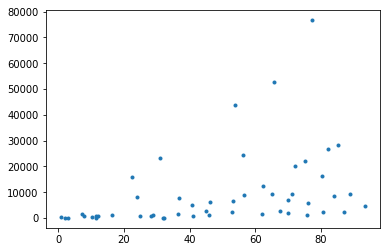

In [31]:
x = df_merged['internetusage'].values.astype(float)
y = df_merged['tvarrival'].values.astype(float)
plt.plot(x,y,'.')
# plt.xscale('log')
# plt.yscale('log')

In [32]:
data_frames = [df_internet,dfcpi,dfimex,dfmig,dfgdp,dftour]

from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['country', 'Year'],
                                            how='inner'), data_frames)
cols = df_merged.loc[:, df_merged.dtypes == object].columns
for i in cols:
    df_merged[i] = df_merged[i].apply(lambda x: x.replace(',',''))
df_merged.shape

(451, 12)

In [34]:
df_merged

,country,Year,internetusage,CPIG,CPIF,Imports,Exports,migrants,GDP,PPP,tourexp,tvarrival
0,Albania,2010,45.0,100,100,4603,1550,1.8,11927,4056,1778,2191
1,Albania,2015,63.3,111.4,118.8,4320,1930,1.8,11387,3895,1613,3784
2,Albania,2017,71.8,115.1,127.3,5826,2262,1.8,13039,4450,2049,4643
3,Algeria,2010,12.5,100,100,41000,57051,0.6,161207,4463,324,2070
4,Algeria,2015,38.2,126.7,131.3,51803,34796,0.6,165979,4163,347,1710
5,Algeria,2017,47.7,142.4,142.5,46053,35191,0.6,167555,4055,172,2451
6,Angola,2005,1.1,53.7,45.5,8321,23835,0.3,36971,1891,103,210
7,Angola,2010,2.8,100,100,18143,52612,0.3,83799,3586,726,425
8,Angola,2015,12.4,161.1,167.3,16758,33048,2.3,116194,4171,1171,592
9,Angola,2017,14.3,280.8,286.6,3845,13311,2.1,126506,4247,884,261


In [46]:
df_merged

,country,Year,internetusage,Imports,Exports,migrants,GDP,PPP,education
0,Afghanistan,2010,4.0,5154,388,0.4,16078,558,17.0676
1,Afghanistan,2015,8.3,7723,571,1.5,20608,611,12.5090
2,Afghanistan,2017,11.4,7384,700,0.4,21993,619,15.6614
3,Albania,2005,6.0,2614,658,2.1,8052,2615,11.3580
4,Albania,2015,63.3,4320,1930,1.8,11387,3895,11.3177
5,Angola,2005,1.1,8321,23835,0.3,36971,1891,7.9924
6,Angola,2010,2.8,18143,52612,0.3,83799,3586,8.6848
7,Argentina,2005,17.7,28689,40106,4.3,200622,5125,15.8082
8,Argentina,2010,45.0,56792,68174,4.4,426487,10346,15.0483
9,Armenia,2005,5.3,1692,937,15.7,5226,1753,13.6481


In [45]:
pd.read_csv('Credit.csv')

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [ ]:
pd.read_csv('./UN_cleaned.csv')